**Project Team ID**: PTID-CDS-OCT-23-1670

**Project id**: PRCP-1025-FlightPricePrediction

**Submitted by**: Anjani Kumar, Trushal Patel, Amit B Patro, K Tanuja

# **Flight Price Prediction**
-----------------------------

## **Business Case-Study**

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning algorithms including: Linear Regression, Decision Tree, Random Forest, Gradient Boosting and XG-Boosting to solve this problem. This can help airlines by predicting what prices they can maintain.


## **Dataset Description**

This Dataset consists Total of 10 Features and 1 Target(Price).

1) Airline: All types of airlines like Indigo, Jet Airways, Air India, and many more.

2) Date_of_Journey: Date on which the passenger journey will start.

3) Source: Name of the place from where the passenger journey will start.

4) Destination: Name of the place to where passenger wanted to travel.

5) Route: Route through which passengers have opted to travel from the source
to their destination.

6) Dep_Time: When the passenger will depart from source.

7) Arrival_Time: When the passenger will arrive to destination.

8) Duration: Whole period that a flight will take to complete its
journey from source to destination.

9) Total_Stops: In how many places flights will stop.

10) Additional_Info: Information about food and other amenities.

11) Price: Price of the flight for a complete journey including all the expenses
before onboarding.

-------------------------------
## **Importing Necessary Packages**

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import  mean_absolute_error, r2_score
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [154]:
df=pd.read_excel('Flight_Fare.xlsx')

---
## **Basic Info**

In [155]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [156]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [158]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [159]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [160]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [161]:
# Removing the null value from datasets.
df.dropna(inplace=True)

In [162]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

-----
## **EDA**

In [163]:
# Converting datatype of Date_of_Journey as datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
print('Datatype:',df['Date_of_Journey'].dtype)
df[['Date_of_Journey']]

Datatype: datetime64[ns]


,Date_of_Journey
0,2019-03-24
1,2019-01-05
2,2019-09-06
3,2019-12-05
4,2019-01-03
...,...
10678,2019-09-04
10679,2019-04-27
10680,2019-04-27
10681,2019-01-03


In [164]:
# Fetching Day and Month from Date_of_Journey and storing it into dataframe

Day=[]
Month=[]
for x in df['Date_of_Journey']:
    day = x.day
    month = x.month
    Day.append(day)
    Month.append(month)

df['Day'] = Day
df['Month'] = Month

df[['Date_of_Journey','Day','Month']]

,Date_of_Journey,Day,Month
0,2019-03-24,24,3
1,2019-01-05,5,1
2,2019-09-06,6,9
3,2019-12-05,5,12
4,2019-01-03,3,1
...,...,...,...
10678,2019-09-04,4,9
10679,2019-04-27,27,4
10680,2019-04-27,27,4
10681,2019-01-03,3,1


In [165]:
# Now we can drop Date_of_Journey since we have Day and month
df.drop('Date_of_Journey',axis=1,inplace=True)

In [166]:
# For Duration feature, convert it into minutes only.

def convert_min(x):
    value,unit = int(x[:-1]), x[-1]
    return value* 60 if unit == 'h' else value

Mins=[]
for x in df['Duration']:
    y=x.split(' ')
    if len(y)==2:
        hr=(int(y[0].replace('h', '')))*60
        total=hr+(int(y[1].replace('m', '')))
    if len(y)==1:
        total=convert_min(y[0])
    Mins.append(total)

df['Duration_Mins']=Mins

df[['Duration','Duration_Mins']]

,Duration,Duration_Mins
0,2h 50m,170
1,7h 25m,445
2,19h,1140
3,5h 25m,325
4,4h 45m,285
...,...,...
10678,2h 30m,150
10679,2h 35m,155
10680,3h,180
10681,2h 40m,160


In [167]:
# Now we can drop Duration since we have Duration(Mins)
df.drop('Duration',axis=1,inplace=True)

In [168]:
# Here in Additional_Info column, No info has 8344 data out of 10682 which is 78.11%, so we can drop this column.

print(df['Additional_Info'].value_counts())
df.drop('Additional_Info',axis=1,inplace=True)

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


In [169]:
# Since we have Source,Destination,Total_Stops, so we can drop Route column also.

df.drop('Route',axis=1,inplace=True)
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Duration_Mins
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,non-stop,4107,4,9,150
10679,Air India,Kolkata,Banglore,20:45,23:20,non-stop,4145,27,4,155
10680,Jet Airways,Banglore,Delhi,08:20,11:20,non-stop,7229,27,4,180
10681,Vistara,Banglore,New Delhi,11:30,14:10,non-stop,12648,3,1,160


In [170]:
# Dividing Dep_Time and Arrival_Time into Morning(M),Afternoon(A),Evening(E),Night(N) slots with respect to time.

df.loc[(df['Dep_Time']>='00:00') & (df['Dep_Time']<'06:00'),'Dep_Time']='M'
df.loc[(df['Arrival_Time']>='00:00') & (df['Arrival_Time']<'06:00'),'Arrival_Time']='M'

df.loc[(df['Dep_Time']>='06:00') & (df['Dep_Time']<'12:00'),'Dep_Time']='A'
df.loc[(df['Arrival_Time']>='06:00') & (df['Arrival_Time']<'12:00'),'Arrival_Time']='A'

df.loc[(df['Dep_Time']>='12:00') & (df['Dep_Time']<'18:00'),'Dep_Time']='E'
df.loc[(df['Arrival_Time']>='12:00') & (df['Arrival_Time']<'18:00'),'Arrival_Time']='E'

df.loc[(df['Dep_Time']>='18:00') & (df['Dep_Time']<'23:59'),'Dep_Time']='N'
df.loc[(df['Arrival_Time']>='18:00') & (df['Arrival_Time']<'23:59'),'Arrival_Time']='N'

df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Duration_Mins
0,IndiGo,Banglore,New Delhi,N,M,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,M,E,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,A,M,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,N,N,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,E,N,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,N,N,non-stop,4107,4,9,150
10679,Air India,Kolkata,Banglore,N,N,non-stop,4145,27,4,155
10680,Jet Airways,Banglore,Delhi,A,A,non-stop,7229,27,4,180
10681,Vistara,Banglore,New Delhi,A,E,non-stop,12648,3,1,160


In [171]:
# Boxplot, there is no need to draw boxplot of these features because Day and month have fixed attributes and others features belongs to categorical dataset.

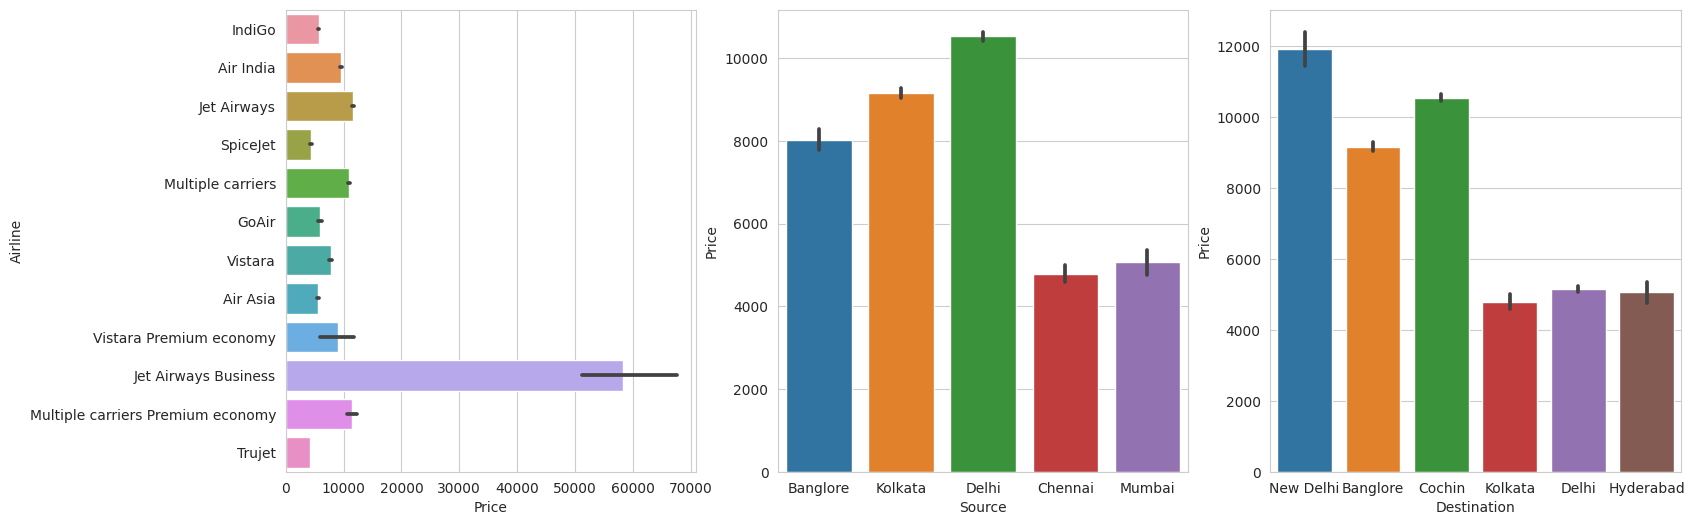

In [172]:
# Graphical Representation of Airline,Source,Destination.

plt.figure(figsize=(18,6))
sns.set_style('whitegrid')
plt.subplot(1,3,1)
sns.barplot(data=df,x='Price',y='Airline')
plt.subplot(1,3,2)
sns.barplot(data=df,x='Source',y='Price')
plt.subplot(1,3,3)
sns.barplot(data=df,x='Destination',y='Price')
plt.show()

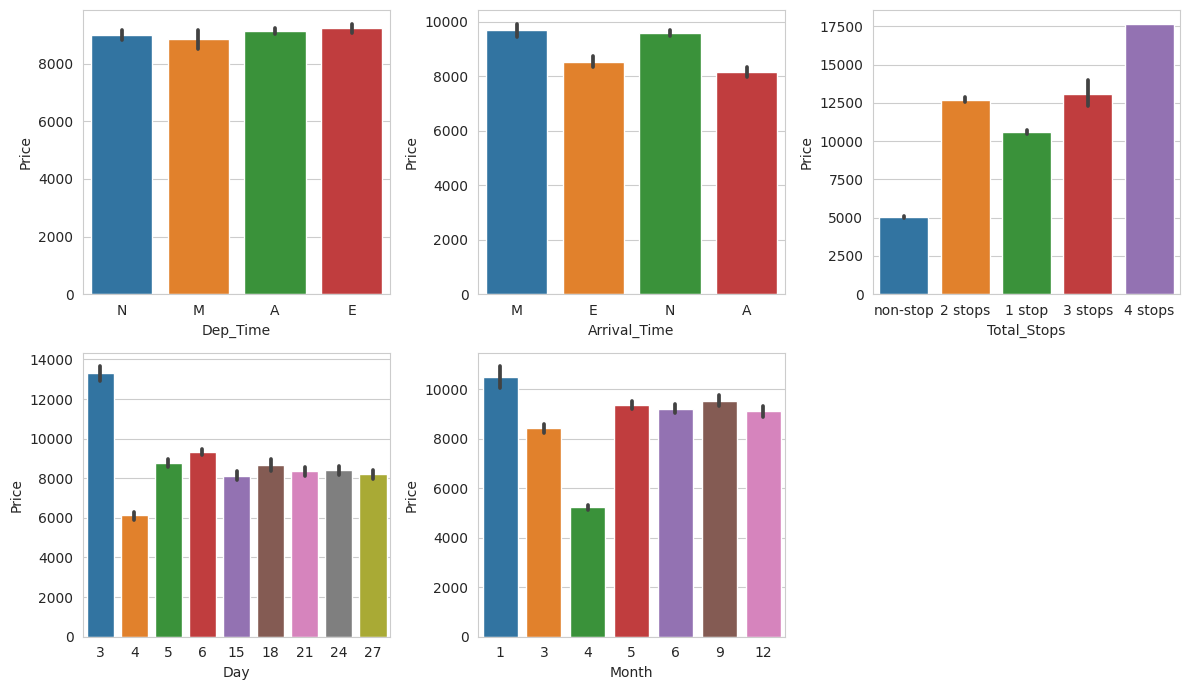

In [173]:
# Graphical Representation of Dep_Time,Arrival_Time,Total_Stops,Day,Month.

plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
i=1
for j in df[['Dep_Time','Arrival_Time','Total_Stops','Day','Month']]:
  plt.subplot(2,3,i)
  sns.barplot(data=df,x=j,y='Price')
  i+=1
plt.tight_layout()
plt.show()

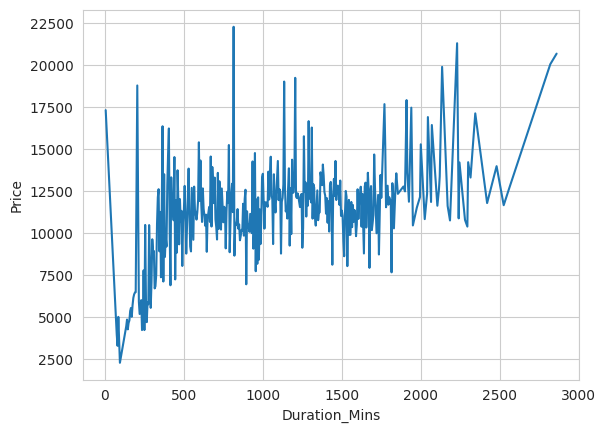

In [174]:
# Graphical Representation of Duration_Mins.
sns.set_style('whitegrid')
sns.lineplot(data=df,x='Duration_Mins',y='Price',ci=None)
plt.show()

### Analysis from Graphs

1) From the Airline, Source and Destination graphs we analyse that we cannot compare these with respect to price that which airline is best or which city is best for source and destination. So we need to perform One-hot encoding for these. Apart from this we can just say that that Jet Airways Business Airlines have more price and Trujet Airline have very less Price.

2) From Dept_Time vs Price graph we analyse that Mornings flights are low as compare to others, and From Arrival_Time vs Price graph we analyse that Afternoon flights are low price compared to others.

3) From Total_Stops we analyse that if number of stops increases then Price also increases. From Day and Month graph we analyse that, 3rd day of the month have highest price, and April month have the lowest price while January month have the highest price.

4) From the Duration_Mins, we analyse that before 500 min price increase with respect to Duration, but after 500 min only slight increase in price can be seen with respect to Duration.

--------
## **Preprocessing**

In [175]:
df.isnull().sum()

Airline          0
Source           0
Destination      0
Dep_Time         0
Arrival_Time     0
Total_Stops      0
Price            0
Day              0
Month            0
Duration_Mins    0
dtype: int64

In [176]:
# To check duplicate values.
df[df.duplicated()]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Duration_Mins
524,Jet Airways,Banglore,New Delhi,A,E,1 stop,7832,21,3,435
683,Jet Airways,Delhi,Cochin,E,M,2 stops,13376,6,1,830
1061,Air India,Delhi,Cochin,N,N,2 stops,10231,21,5,1275
1242,IndiGo,Mumbai,Hyderabad,N,N,non-stop,2754,15,3,85
1348,Air India,Delhi,Cochin,E,N,2 stops,12392,18,5,1560
...,...,...,...,...,...,...,...,...,...,...
10664,IndiGo,Banglore,Delhi,N,N,non-stop,4823,4,9,175
10665,IndiGo,Kolkata,Banglore,E,E,non-stop,4804,27,4,150
10672,Jet Airways,Delhi,Cochin,N,N,2 stops,11150,27,6,1195
10673,Jet Airways,Delhi,Cochin,E,M,2 stops,16704,27,5,900


In [177]:
# So we have found 383 duplicated rows in the dataset which we have to remove.
df.drop(df[df.duplicated()].index,axis=0,inplace=True)

In [178]:
# One hot encoding of Airline

airline = df['Airline']
Airline = pd.get_dummies(airline)
Airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,0,0,0,0,0,0,0,1,0,0,0
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [179]:
# One hot encoding of Source

source = df['Source']
Source = pd.get_dummies(source)
Source.rename({'Banglore':'S_Banglore','Chennai':'S_Chennai','Delhi':'S_Delhi','Kolkata':'S_Kolkata','Mumbai':'S_Mumbai'},axis=1,inplace=True)
Source

,S_Banglore,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10677,1,0,0,0,0
10678,0,0,0,1,0
10679,0,0,0,1,0
10681,1,0,0,0,0


In [180]:
# One hot encoding of Destination

destination = df['Destination']
Destination = pd.get_dummies(destination)
Destination.rename({'Banglore':'D_Banglore','Cochin':'D_Cochin','Kolkata':'D_Kolkata','Delhi':'D_Delhi','Hyderabad':'D_Hyderabad','New Delhi':'D_New Delhi'},axis=1,inplace=True)
Destination

,D_Banglore,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10677,0,0,1,0,0,0
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10681,0,0,0,0,0,1


In [181]:
# Merge all dummies column with df
pd.set_option('display.max_columns',None)
df=pd.concat([Airline,Source,Destination,df],axis=1)
df

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Banglore,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Banglore,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New Delhi,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Duration_Mins
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,IndiGo,Banglore,New Delhi,N,M,non-stop,3897,24,3,170
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,Air India,Kolkata,Banglore,M,E,2 stops,7662,5,1,445
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,Jet Airways,Delhi,Cochin,A,M,2 stops,13882,6,9,1140
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,IndiGo,Kolkata,Banglore,N,N,1 stop,6218,5,12,325
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,IndiGo,Banglore,New Delhi,E,N,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,SpiceJet,Banglore,Delhi,M,A,non-stop,3257,21,5,160
10678,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,Air Asia,Kolkata,Banglore,N,N,non-stop,4107,4,9,150
10679,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,Air India,Kolkata,Banglore,N,N,non-stop,4145,27,4,155
10681,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,Vistara,Banglore,New Delhi,A,E,non-stop,12648,3,1,160


In [182]:
# After One-hot encoding, we can drop Airline,Source and Destination features

df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

### Mapping

In [183]:
# We done mapping in such a way that, we prioritise unique value of every features from low to high with respect to bar plot.

df['Dep_Time'].replace({'M':0,'A':2,'E':3,'N':1},inplace=True)
df['Arrival_Time'].replace({'M':3,'A':0,'E':1,'N':2},inplace=True)
df['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

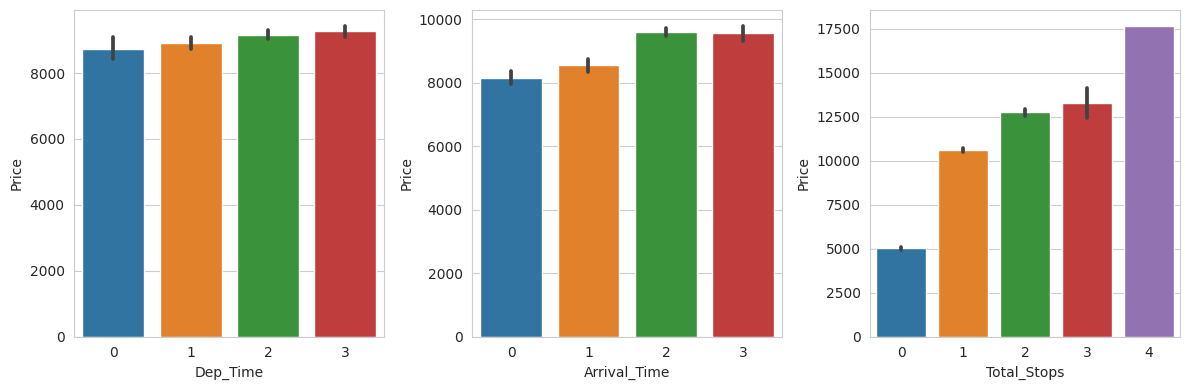

In [184]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
i=1
for j in df[['Dep_Time','Arrival_Time','Total_Stops']]:
  plt.subplot(1,3,i)
  sns.barplot(data=df,x=j,y='Price')
  i+=1
plt.tight_layout()
plt.show()

<Axes: >

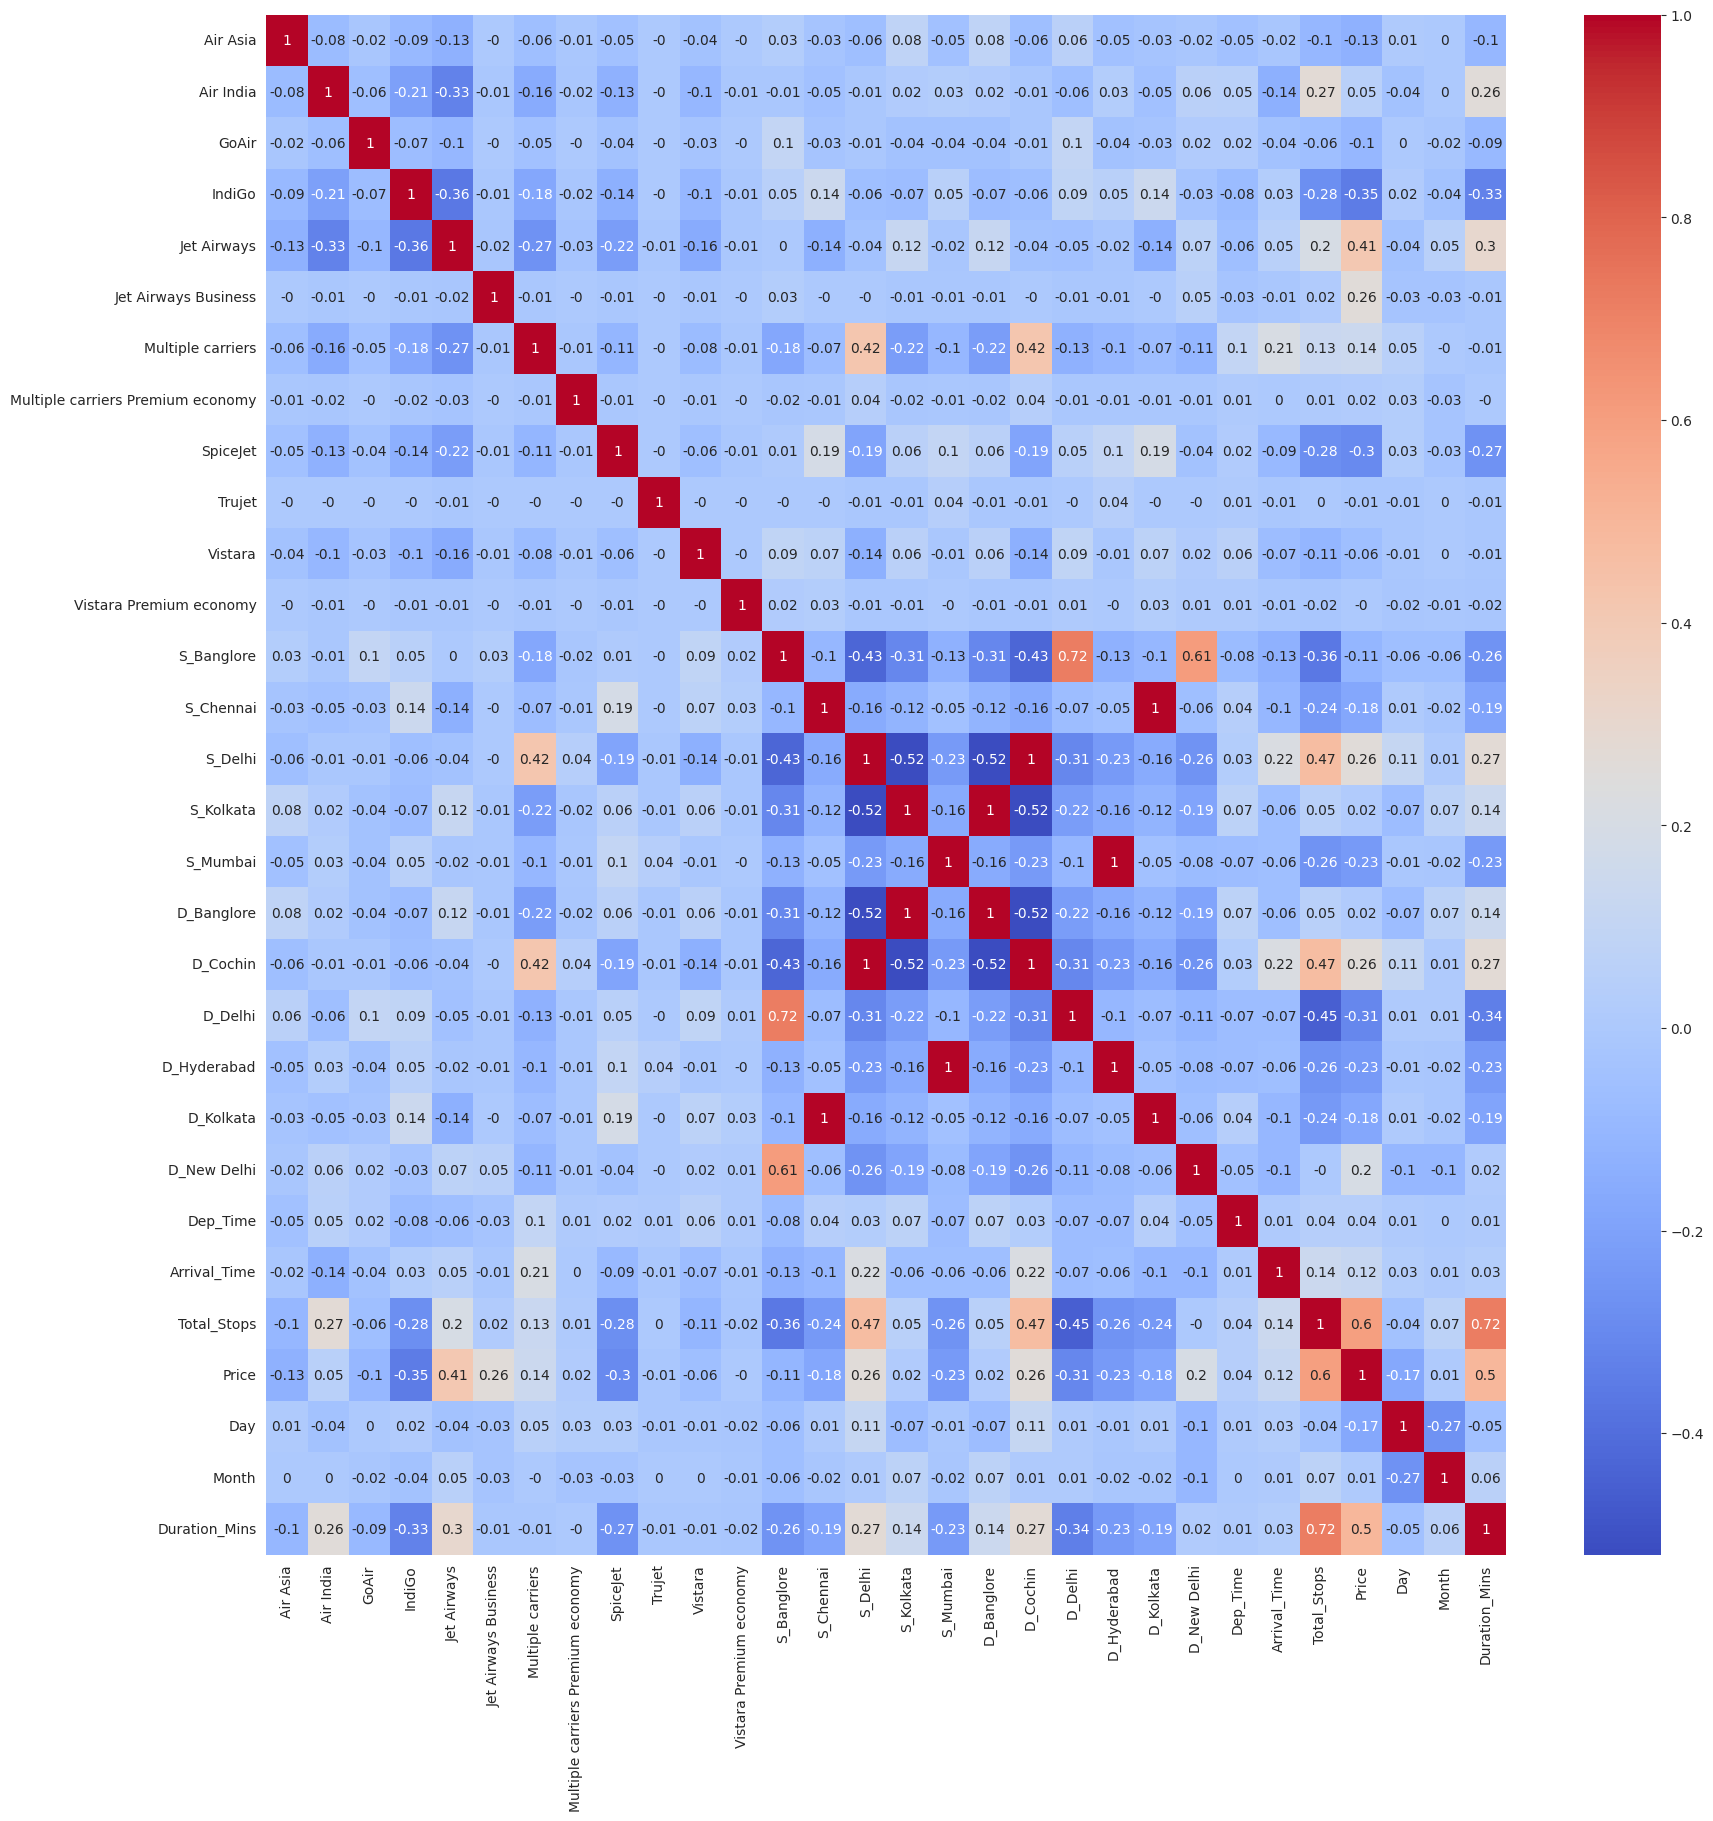

In [185]:
# Heatmap to check correlations between features

plt.figure(figsize=(20,20))
sns.heatmap(round(df.corr(),2),annot=True,cmap='coolwarm')

In [186]:
# From Heatmap we analyse that (S_Chennai,D_Kolkata),(S_Delhi,D_Cochin),(S_Kolkata,D_Banglore),(S_Mumbai,D_Hyderabad) have correlation with each other
# and showing 1 in graph.

df[['S_Chennai','S_Delhi','S_Kolkata','S_Mumbai','D_Banglore','D_Cochin','D_Hyderabad','D_Kolkata']].corr()

,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Banglore,D_Cochin,D_Hyderabad,D_Kolkata
S_Chennai,1.000000,-0.164676,-0.118197,-0.051173,-0.118197,-0.164676,-0.051173,1.000000
S_Delhi,-0.164676,1.000000,-0.523789,-0.226775,-0.523789,1.000000,-0.226775,-0.164676
S_Kolkata,-0.118197,-0.523789,1.000000,-0.162769,1.000000,-0.523789,-0.162769,-0.118197
S_Mumbai,-0.051173,-0.226775,-0.162769,1.000000,-0.162769,-0.226775,1.000000,-0.051173
D_Banglore,-0.118197,-0.523789,1.000000,-0.162769,1.000000,-0.523789,-0.162769,-0.118197
D_Cochin,-0.164676,1.000000,-0.523789,-0.226775,-0.523789,1.000000,-0.226775,-0.164676
D_Hyderabad,-0.051173,-0.226775,-0.162769,1.000000,-0.162769,-0.226775,1.000000,-0.051173
D_Kolkata,1.000000,-0.164676,-0.118197,-0.051173,-0.118197,-0.164676,-0.051173,1.000000


In [187]:
#  So we can remove any one feature either Source or Destination to avoid this problem. Thus we are dropping all Destination columns.
df.drop(['D_Banglore','D_Cochin','D_Delhi','D_Hyderabad','D_Kolkata','D_New Delhi'],axis=1,inplace=True)
df

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Banglore,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Duration_Mins
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0,3897,24,3,170
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,7662,5,1,445
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,3,2,13882,6,9,1140
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1,6218,5,12,325
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,2,1,13302,3,1,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,3257,21,5,160
10678,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,4107,4,9,150
10679,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,4145,27,4,155
10681,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,1,0,12648,3,1,160


--------
## **Model Creation**

1) Linear Regression

2) Decision Tree

3) Random Forest

4) Gradient Boosting

5) XG-Boosting

In [188]:
X=df.drop('Price',axis=1)
Y=df.Price
print('X shape:',X.shape,'&','Y shape:',Y.shape)

X shape: (10299, 23) & Y shape: (10299,)


In [189]:
# We have to scale entire dataset between 0 to 1 that is MinMAx scaling because there are some features like Day, Month which should not goes
# below zero. After scaling we got dataset into array format so we converted that dataset into dataframe also.

from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
X_scaled=MMS.fit_transform(X)
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns)
X_scaled_df


,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Banglore,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,Dep_Time,Arrival_Time,Total_Stops,Day,Month,Duration_Mins
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,1.000000,0.00,0.875000,0.181818,0.057793
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.333333,0.50,0.083333,0.000000,0.154116
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,1.000000,0.50,0.125000,0.727273,0.397548
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.666667,0.25,0.083333,1.000000,0.112084
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.666667,0.25,0.000000,0.000000,0.098074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.750000,0.363636,0.054291
10295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.666667,0.00,0.041667,0.727273,0.050788
10296,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.666667,0.00,1.000000,0.272727,0.052539
10297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.00,0.000000,0.000000,0.054291


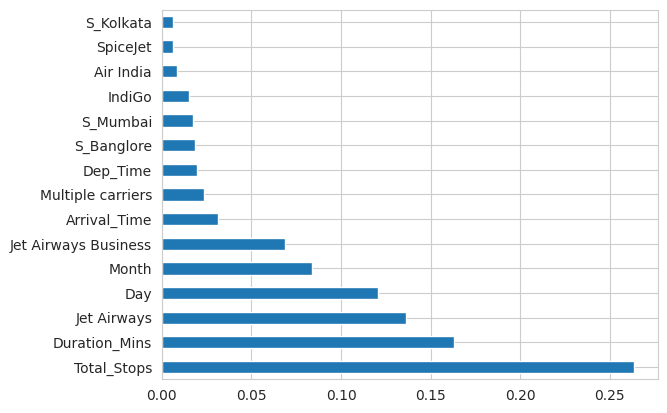

In [190]:
# Show Top 15 features in the entire datasets using ExtraTreesRegressor.

from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(X_scaled_df,Y)
Importance = pd.Series(ETR.feature_importances_,index=X_scaled_df.columns)
Importance.nlargest(15).plot(kind='barh')
plt.show()

In [191]:
# We took 80% dataset for training purpose and remaining 20% dataset for testing purpose because our dataset is very small.

from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_scaled_df,Y,test_size=0.2)
print('Xtrain shape:',Xtrain.shape, '&', 'Xtest shape:',Xtest.shape)
print('Ytrain shape:',Ytrain.shape, '&', 'Ytest shape:',Ytest.shape)

Xtrain shape: (8239, 23) & Xtest shape: (2060, 23)
Ytrain shape: (8239,) & Ytest shape: (2060,)


In [192]:
# We are using Pycaret Library to see which models gives best output according to dataset.
# !pip install pycaret

In [193]:
# # After installing Pycaret Re-Run this cell.
# from pycaret.regression import *
# clf = setup(data=df, target='Price', session_id=42)
# compare_models()

### **1st Model : Linear Regression**

In [194]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(Xtrain,Ytrain)

LinearRegression()

In [195]:
# Prediction of test data:
Ypred=LR.predict(Xtest)
LR_R2=r2_score(Ytest,Ypred)
LR_MAE=mean_absolute_error(Ytest,Ypred)
print('R2 score:',LR_R2)
print('MAE',LR_MAE)

R2 score: 0.5996720892797887
MAE 1970.5733009708738


In [196]:
# Checking overfitting of model or not from training dataset

Ypred_train=LR.predict(Xtrain)
print('R2 score:',r2_score(Ytrain,Ypred_train))
print('MAE:',mean_absolute_error(Ytrain,Ypred_train))

# It is Not overfitted.

R2 score: 0.5913342202440002
MAE: 2067.2916616094185


In [197]:
# Result of Linear Regression
data = [['R2 score(%)',round(LR_R2*100,2)],['MAE',LR_MAE]]
head = ['Result','Linear Regression']
print(tabulate(data,headers=head, tablefmt='grid'))


+-------------+---------------------+
| Result      |   Linear Regression |
+=============+=====================+
| R2 score(%) |               59.97 |
+-------------+---------------------+
| MAE         |             1970.57 |
+-------------+---------------------+


### **2nd model : Decision Tree**

In [198]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(Xtrain,Ytrain)

DecisionTreeRegressor()

In [199]:
# Prediction of test data:
Ypred=DTR.predict(Xtest)
DTR_R2=r2_score(Ytest,Ypred)
DTR_MAE=mean_absolute_error(Ytest,Ypred)
print('R2 score:',DTR_R2)
print('MAE:',DTR_MAE)

R2 score: 0.7105992299390582
MAE: 1460.1158980582525


In [200]:
# Checking overfitting/underfitting of model or not from training dataset

Ypred_train=DTR.predict(Xtrain)
print('R2 score:',r2_score(Ytrain,Ypred_train))
print('MAE:',mean_absolute_error(Ytrain,Ypred_train))

# It is overfitted because training accuracy is much higher than testing accuracy. So we need to perform hyperparameter tuning.

R2 score: 0.9692617329634515
MAE: 336.8730954403852


In [201]:
# # Hyperparameter of Decision Tree : We define RandomsearchCV for faster result, and set the parameters range accordingly after that
# #                                   we make grid and then fit the model into it, and then predict the testing accuracy.

# from sklearn.model_selection import RandomizedSearchCV
# parameter = {"criterion":('squared_error','absolute_error'),"splitter":("best","random"),"max_depth":(list(range(8, 18))),
#              "min_samples_split":(list(range(2,6))),"min_samples_leaf":(list(range(1, 5)))}
# DTR=DecisionTreeRegressor()
# Grid=RandomizedSearchCV(estimator=DTR,param_distributions=parameter,scoring="r2",cv=3,random_state=42)
# Grid.fit(Xtrain,Ytrain)

In [202]:
# print('Best parameters:',Grid.best_params_)

In [203]:
print('We found these parameters will give best results: criterion=squared_error,splitter=random,max_depth=16,min_samples_split=3,min_samples_leaf=3')

We found these parameters will give best results: criterion=squared_error,splitter=random,max_depth=16,min_samples_split=3,min_samples_leaf=3


In [204]:
# We put these best parameter and then train model again.
DTR = DecisionTreeRegressor(criterion='squared_error',splitter='random',max_depth=16,min_samples_split=3,min_samples_leaf=3)
DTR.fit(Xtrain,Ytrain)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=3, min_samples_split=3,
                      splitter='random')

In [205]:
# Prediction of test data

Ypred=DTR.predict(Xtest)
DTR_R2_Hyper=r2_score(Ytest,Ypred)
DTR_MAE_Hyper=mean_absolute_error(Ytest,Ypred)
print('R2 score:',DTR_R2_Hyper)
print('MAE:',DTR_MAE_Hyper)

R2 score: 0.7452833780595318
MAE: 1449.805436677517


In [206]:
# Checking overfitting/underfitting of model or not from training dataset
Ypred_train=DTR.predict(Xtrain)
print('R2 score:',r2_score(Ytrain,Ypred_train))
print('MAE:',mean_absolute_error(Ytrain,Ypred_train))

# It is Not overfitted.

R2 score: 0.8617241202076631
MAE: 1100.6512333084866


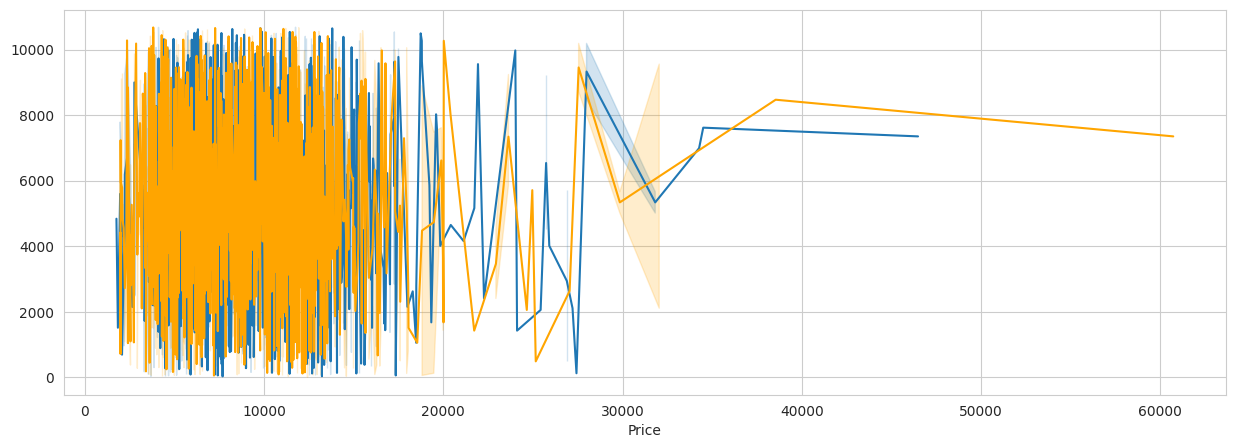

In [207]:
# Graphical representation of Ytest and Ypred

plt.figure(figsize=(15,5))
sns.lineplot(x=Ytest,y=Ytest.index)
sns.lineplot(x=Ypred,y=Ytest.index,color='orange')
plt.show()

# From the below graph we analyse that below 20000 we are very much accurate on Flight price prediction.

In [208]:
# Result of Decision Tree
data = [['Before Hyperparameter',round(DTR_R2*100,2),DTR_MAE],['After Hyperparameter',round(DTR_R2_Hyper*100,2),DTR_MAE_Hyper]]
head = ['Result','R2score(%)','MAE']
print(tabulate(data,headers=head, tablefmt='grid'))

+-----------------------+--------------+---------+
| Result                |   R2score(%) |     MAE |
+=======================+==============+=========+
| Before Hyperparameter |        71.06 | 1460.12 |
+-----------------------+--------------+---------+
| After Hyperparameter  |        74.53 | 1449.81 |
+-----------------------+--------------+---------+


### **3rd Model: Random Forest**

In [209]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100)
RFR.fit(Xtrain,Ytrain)

RandomForestRegressor()

In [210]:
# Prediction of test data

Ypred=RFR.predict(Xtest)
RFR_R2=r2_score(Ytest,Ypred)
RFR_MAE=mean_absolute_error(Ytest,Ypred)
print('R2 score:',RFR_R2)
print('MAE:',RFR_MAE)

R2 score: 0.7951806409297931
MAE: 1292.319441158814


In [211]:
# Checking overfitting/underfitting of model or not from training dataset

Ypred_train=RFR.predict(Xtrain)
print('R2 score:',r2_score(Ytrain,Ypred_train))
print('MAE:',mean_absolute_error(Ytrain,Ypred_train))

# It is overfitted because training accuracy is much higher than testing accuracy. So we need to perform hyperparameter tuning.

R2 score: 0.9504752834055362
MAE: 623.4738854803912


In [212]:
# # Hyperparameter of Random Forest: We define RandomsearchCV for faster result, and set the parameters range accordingly after that
# #                                  we make grid and then fit the model into it, and then predict the testing accuracy.

# from sklearn.model_selection import RandomizedSearchCV
# parameters={'n_estimators':[100,200,300,400,500,600,700,800,900,1000],'max_features':['auto','sqrt'],'bootstrap':[True,False],
#             'max_depth':(list(range(8,18))),'min_samples_split':(list(range(2,6))),'min_samples_leaf':(list(range(1,5)))}

# RFR=RandomForestRegressor()
# Grid= RandomizedSearchCV(estimator=RFR,param_distributions=parameters,n_iter=100,n_jobs=-1,scoring='f1',cv=3,random_state=42)
# Grid.fit(Xtrain,Ytrain)

In [213]:
# print('Best parameters:',Grid.best_params_)

In [214]:
print('We found these parameters will give best results: n_estimators=300,min_samples_split=5,min_samples_leaf=2,max_features=auto,max_depth=14,bootstrap=True')

We found these parameters will give best results: n_estimators=300,min_samples_split=5,min_samples_leaf=2,max_features=auto,max_depth=14,bootstrap=True


In [215]:
# We put these best parameter and then train model again.
RFR = RandomForestRegressor(n_estimators=300,min_samples_split=5,min_samples_leaf=2,max_features='auto',max_depth=14,bootstrap=True)
RFR.fit(Xtrain,Ytrain)

RandomForestRegressor(max_depth=14, max_features='auto', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=300)

In [216]:
# Prediction of test data

Ypred=RFR.predict(Xtest)
RFR_R2_Hyper=r2_score(Ytest,Ypred)
RFR_MAE_Hyper=mean_absolute_error(Ytest,Ypred)
print('R2 score:',RFR_R2_Hyper)
print('MAE:',RFR_MAE_Hyper)

R2 score: 0.8253689721761641
MAE: 1231.0547516110946


In [217]:
# Checking overfitting/underfitting of model or not from training dataset

Ypred_train=RFR.predict(Xtrain)
print('R2 score:',r2_score(Ytrain,Ypred_train))
print('MAE:',mean_absolute_error(Ytrain,Ypred_train))

# It is not overfitted.

R2 score: 0.900441868956339
MAE: 936.2887767256424


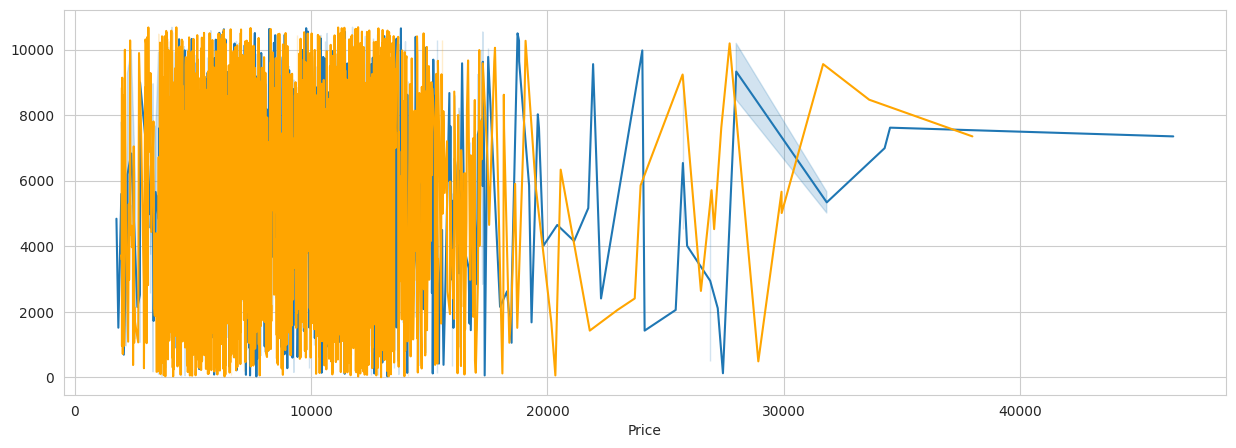

In [218]:
# Graphical representation of Ytest and Ypred

plt.figure(figsize=(15,5))
sns.lineplot(x=Ytest,y=Ytest.index)
sns.lineplot(x=Ypred,y=Ytest.index,color='orange')
plt.show()

# From the below graph we analyse that below 20000 we are very much accurate on Flight price prediction.

In [219]:
# Result of Random Forest
data = [['Before Hyperparameter',round(RFR_R2*100,2),RFR_MAE],['After Hyperparameter',round(RFR_R2_Hyper*100,2),RFR_MAE_Hyper]]
head = ['Result','R2score(%)','MAE']
print(tabulate(data,headers=head, tablefmt='grid'))

+-----------------------+--------------+---------+
| Result                |   R2score(%) |     MAE |
+=======================+==============+=========+
| Before Hyperparameter |        79.52 | 1292.32 |
+-----------------------+--------------+---------+
| After Hyperparameter  |        82.54 | 1231.05 |
+-----------------------+--------------+---------+


### **4th Model: Gradient Boosting**

In [220]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(Xtrain,Ytrain)

GradientBoostingRegressor()

In [221]:
# Prediction of test data

Ypred=GBR.predict(Xtest)
GBR_R2=r2_score(Ytest,Ypred)
GBR_MAE=mean_absolute_error(Ytest,Ypred)
print('R2 score:',GBR_R2)
print('MAE',GBR_MAE)

R2 score: 0.778067369420715
MAE 1472.0300083830982


In [222]:
# Checking overfitting/underfitting of model or not from training dataset
Ypred_train=GBR.predict(Xtrain)
print('R2 score:',r2_score(Ytrain,Ypred_train))
print('MAE:',mean_absolute_error(Ytrain,Ypred_train))

# It is Not overfitted.

R2 score: 0.7771886424563297
MAE: 1507.6928829414655


<Axes: xlabel='Price'>

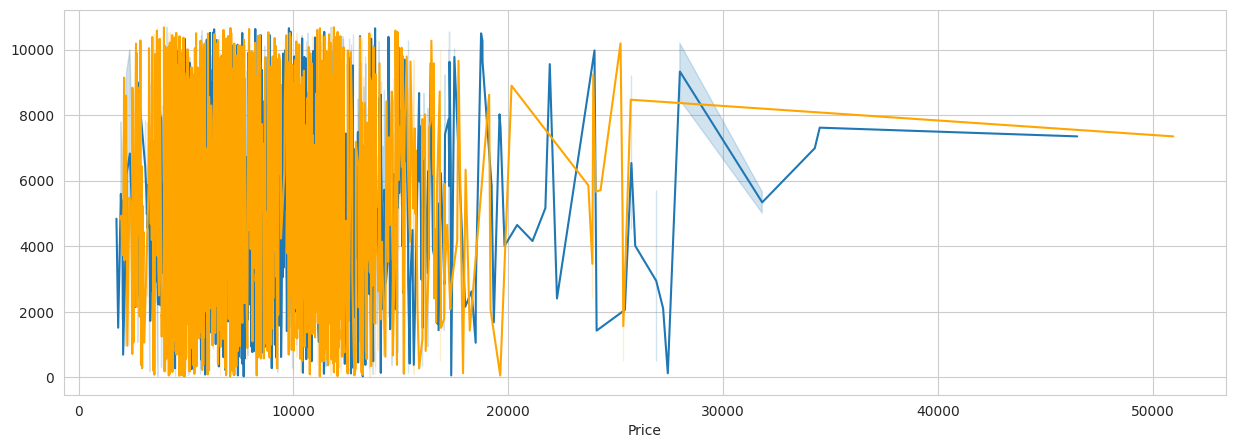

In [223]:
# Graphical representation of Ytest and Ypred

plt.figure(figsize=(15,5))
sns.lineplot(x=Ytest,y=Ytest.index)
sns.lineplot(x=Ypred,y=Ytest.index,color='orange')

# From the below graph we analyse that below 20000 we are very much accurate on Flight price prediction.

In [224]:
# Result of Gradient Boosting
data = [['R2score(%)',round(GBR_R2*100,2)],['MAE',GBR_MAE]]
head = ['Result','Gradient Boosting']
print(tabulate(data,headers=head, tablefmt='grid'))

+------------+---------------------+
| Result     |   Gradient Boosting |
+============+=====================+
| R2score(%) |               77.81 |
+------------+---------------------+
| MAE        |             1472.03 |
+------------+---------------------+


### **5th Model: XG-Boosting**

In [225]:
!pip install xgboost

In [226]:
from xgboost import XGBRegressor
XGBR = XGBRegressor()
XGBR.fit(Xtrain,Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [227]:
# Prediction of test data

Ypred=XGBR.predict(Xtest)
XGBR_R2=r2_score(Ytest,Ypred)
XGBR_MAE=mean_absolute_error(Ytest,Ypred)
print('R2 score:',XGBR_R2)
print('MAE:',XGBR_MAE)

R2 score: 0.831255967844482
MAE: 1236.1923134220456


In [228]:
# Checking overfitting of model or not from training dataset

Ypred_train=XGBR.predict(Xtrain)
print('R2 score:',r2_score(Ytrain,Ypred_train))
print('MAE:',mean_absolute_error(Ytrain,Ypred_train))

# It is not overfitted.

R2 score: 0.9189883329974793
MAE: 939.7257368696852


<Axes: xlabel='Price'>

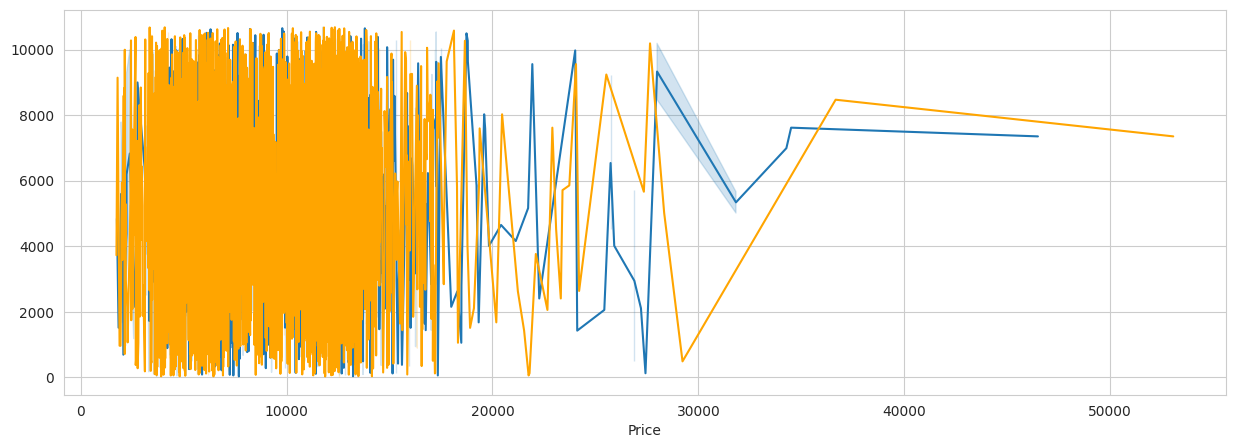

In [229]:
# Graphical representation of Ytest and Ypred

plt.figure(figsize=(15,5))
sns.lineplot(x=Ytest,y=Ytest.index)
sns.lineplot(x=Ypred,y=Ytest.index,color='orange')

# From the below graph we analyse that below 20000 we are very much accurate on Flight price prediction.

In [230]:
# Result of XG-Boosting
data = [['R2 score(%)',round(XGBR_R2*100,2)],['MAE',XGBR_MAE]]
head = ['Result','XG-Boosting']
print(tabulate(data,headers=head, tablefmt='grid'))


+-------------+---------------+
| Result      |   XG-Boosting |
+=============+===============+
| R2 score(%) |         83.13 |
+-------------+---------------+
| MAE         |       1236.19 |
+-------------+---------------+


-------
## **Model Comparison Report**:

In [231]:
from tabulate import tabulate
data = [['XG-Boosting',round(XGBR_R2*100,2),XGBR_MAE,'1st(BEST)'],['Random Forest',round(RFR_R2_Hyper*100,2),RFR_MAE_Hyper,'2nd'],
 ['Gradient Boosting',round(GBR_R2*100,2),GBR_MAE,'3rd'],['Decision Tree',round(DTR_R2_Hyper*100,2),DTR_MAE_Hyper,'4th'],
  ['Linear Regression',round(LR_R2*100,2),LR_MAE,'5th']]

head = ['Model Name','R2 score(%)','MAE','Ranking order']
print(tabulate(data,headers=head, tablefmt='grid'))

# Best model for this dataset is XG-Boosting.

+-------------------+---------------+---------+-----------------+
| Model Name        |   R2 score(%) |     MAE | Ranking order   |
+===================+===============+=========+=================+
| XG-Boosting       |         83.13 | 1236.19 | 1st(BEST)       |
+-------------------+---------------+---------+-----------------+
| Random Forest     |         82.54 | 1231.05 | 2nd             |
+-------------------+---------------+---------+-----------------+
| Gradient Boosting |         77.81 | 1472.03 | 3rd             |
+-------------------+---------------+---------+-----------------+
| Decision Tree     |         74.53 | 1449.81 | 4th             |
+-------------------+---------------+---------+-----------------+
| Linear Regression |         59.97 | 1970.57 | 5th             |
+-------------------+---------------+---------+-----------------+


--------
## **Challenges faced**:

We have to work in EDA part for features like Date_of_Journey, Duration, Dep_Time, Arrival_Time.

From Date_of_Journey we generate two columns Day and Month.

From Duration we converted it into minutes as Duration_Mins.

From Dep_Time and Arrival_time we have to convert time-zones into Morning,
Afternoon, Evening and Night slots accordingly.

Logic of these conversions is little bit tricky.

--------